# Лабораторная работа №9 


# Содержательная постановка задачи 1.
В данной лабораторной работе исследуются взаимоотношения в системе «хищник - жертва». Объектом исследования  является модель двувидовой борьбы (соперничества), а именно модель взаимодействия двух популяций: хищников и их жертв. Взаимодействие жертвы с хищником выражается в изменении численности жертвы, которая в свою очередь сказывается на численности хищника. В данной лабораторной работе рассматривается система популяции Плотоядных и Растительноядных животных.

# Концептуальная постановка задачи 2. 
Введём следующие упрощающие предположения:


* Численности двух популяций зависят только от времени (среда проживания популяций изолирована)


* Среда проживания обеспечивает всем необходимым для жизни видов (травоядных)


* В отсутствии взаимодействия численность видов изменяется по модели Мальтуса, причем численность жертв растёт, а хищников падает


* Естественная рождаемость и смертность хищника не учитывается (то есть рождаемость хищников считается обусловленной только тем, что они поедают жертв, а смертность жертв – только тем, что их поедают хищники);


* Эффект насыщения численности обоих популяций  не учитывается


* Скорость роста численности жертвы уменьшается пропорционально численности хищников, а темп роста хищников увеличивается пропорционально численности жертвы. 


## Математическая постановка задачи 3. 
При построении модели используются следующие переменные и константы:
* время;
* численность популяции жертв
* численность популяции хищников
* коэффициент рождаемости жертв
* коэффициент смертности хищников
* коэффициент влияния численности хищников на численность жертв
* коэффициент влияния численности жертв на численность хищников
* коэффициент насыщения численности жертв
* оэффициент насыщения численности хищников
* начальная численность жертв
* начальная численность хищников 
 

Все приведенные выше коэффициенты являются неотрицательными, т.е $\alpha >= 0 , \beta >= 0  , c>= 0 , d >= 0 , h>= 0 , s>= 0 $

Исходя из данных упрощающих предположений, можем записать систему уравнений Лотки  - Вольтера, описывающую математическую модель:
1. <center>  $\frac{dN}{dt} = (\alpha- c*N)*N$ <center>
2. <center> $ \frac{dN}{dt} = (\beta - d*N)*M$ <center> 
    
    
Из этих уравнений по начальным численностям $N(0) = N_{t=0}, M(0) = M_{t=0}$ определяется численность популяции в любой момент t > 0  . 

Разделим первое уравнение на второе : 
    
3. <center> $\frac{dN}{dM} = \frac{(\alpha- cN)*N}{(\beta - d*N)*M}$ <center> 
    
Уравнения 1 и 2 имеют стационарное , не зависящие от времени , решения (имеют положение равновесия ) : 
    
    
4. <center>$ M_0 = \frac{a}{c} , N_0 = \frac{\beta}{d}$
    
Вопрос об устойчивости положнения равновесия . Для поинмания временной динамики финкций N(t) и M(t) , преобразуем полученное ранее уравнение : 
    
5. <center> $ dN(-\beta +d*N)*M = dM(\alpha - cM) *N$ 
    
6. <center> $ \beta(\frac{dN}{N} - ddN +\alpha(\frac{dM}{M}) - cdM =0$ <center> 
    
Проинтегрировав последнее уравнение , получим соотношение : 
    
7. <center> $\beta*lnN - dN + \alpha*lnM -cM =const$ <center> 
    
Где константа в правой части определяется по начальным значениям N(0) и M(0) . Другими словами , уравнение имеет интеграл вида : 
    
8. <center>$ lnN^{\beta} + lne^{-dN} + lnM^{\alpha} + lne^{-cN} = const $ <center> 
    
Потенциируя последенее выражение получим следующий интеграл : 
    
9. <center> $N^{\beta}e^{-bN} = C_1M^{-\alpha}e^{cM}$ <center> 
    
Где $ C_1> 0$ 

# Реализация 

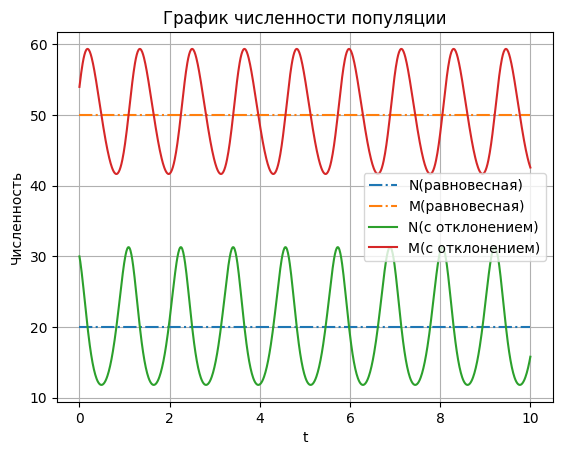

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def func1(y, t):
    global a, b, c, d
    
    dy = np.zeros(2)
    dy[0] = (a - c*y[1]) * y[0]
    dy[1] = (-b + d*y[0]) * y[1]
    
    return dy

a = 15
b = 2
c = 0.3
d = 0.1

N_0 = b/d
M_0 = a/c
deltaN = 10
deltaM = 4

t = np.linspace(0, 10, 1000)  


sol1 = odeint(func1, [N_0, M_0], t)
sol2 = odeint(func1, [N_0 + deltaN, M_0 + deltaM], t)


plt.figure()
plt.plot(t, sol1[:, 0], '-.', label='N(равновесная)')
plt.plot(t, sol1[:, 1], '-.', label='M(равновесная)')
plt.plot(t, sol2[:, 0], label='N(c отклонением)')
plt.plot(t, sol2[:, 1], label='M(c отклонением)')
plt.xlabel('t')
plt.ylabel('Численность')
plt.title('График численности популяций')
plt.legend()
plt.grid(True)
plt.show()


#### Видно , что колебания происходят относительно равномерной численности  

#### Теперь нарисуем фазовые траектории системы 

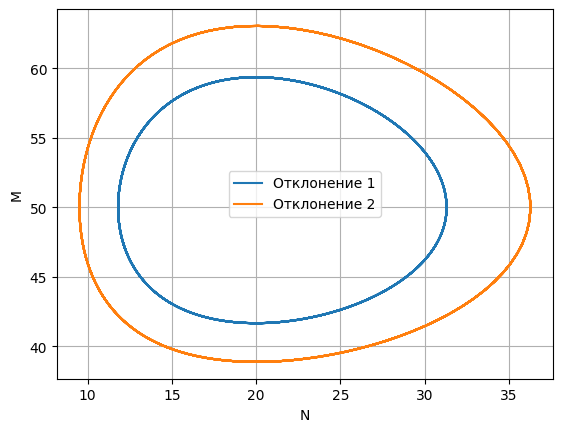

In [4]:
t = np.linspace(0, 10, 1000)  

sol2 = odeint(func1, [N_0 + deltaN, M_0 + deltaM], t)

sol3 = odeint(func1, [N_0 - deltaN, M_0 - deltaM], t)

plt.figure()
plt.plot(sol2[:, 0], sol2[:, 1], label='Отклонение 1')
plt.plot(sol3[:, 0], sol3[:, 1], label='Отклонение 2')
plt.xlabel('N')
plt.ylabel('M')
plt.legend()
plt.grid(True)
plt.show()


Вывод: по графикам можно сделать вывод, что численности популяций жертв и хищников совершают периодические колебания вокруг состояния равновесия. Амплитуда этих колебаний определяется начальными условиями задачи.


Для того, чтобы математическая модель точнее соответствовала реальности, учтем насыщение популяции жертв. Для этого добавим в уравнение (1) коэффициент насыщения (), получим, что изменение численностей во времени уже не будет являться периодическим, а станет стремиться к равновесным состояниям.

10.  <center>$ \frac{dN}{dt} = (\alpha - cM - hN)*N $ <center> 
   
    
11.  <center>$ \frac{dM}{dt} = (-\beta +dN)*M $ <center> 

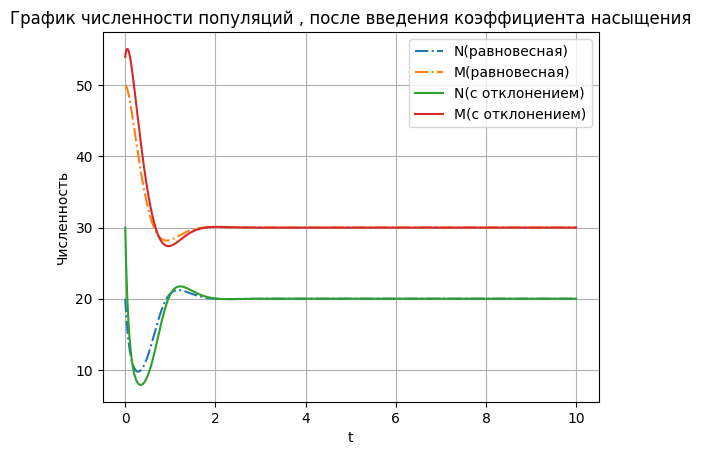

In [7]:
def func3(y, t):
    global a, b, c, d, h
    
    dy = np.zeros(2)
    dy[0] = (a - c*y[1] - h*y[0]) * y[0]
    dy[1] = (-b + d*y[0]) * y[1]
    
    return dy

a = 15
b = 2
c = 0.3
d = 0.1
h = 0.3

N_0 = b/d
M_0 = a/c
deltaN = 10
deltaM = 4

t = np.linspace(0, 10, 1000)  

sol1 = odeint(func3, [N_0, M_0], t)
sol2 = odeint(func3, [N_0 + deltaN, M_0 + deltaM], t)


plt.figure()
plt.title('График численности популяций , после введения коэффициента насыщения')
plt.plot(t, sol1[:, 0], '-.', label='N(равновесная)')
plt.plot(t, sol1[:, 1], '-.', label='M(равновесная)')
plt.plot(t, sol2[:, 0], label='N(c отклонением)')
plt.plot(t, sol2[:, 1], label='M(c отклонением)')
plt.xlabel('t')
plt.ylabel('Численность')
plt.legend()
plt.grid(True)
plt.show()


Численности популяций совершают затухающие колебания. Величина стремится к некоторому равновесному состоянию. Стоит отметить, что это равновесное состояние отличается от равновесного состояния, в случае, когда не учитывалось насыщение популяции жертв.


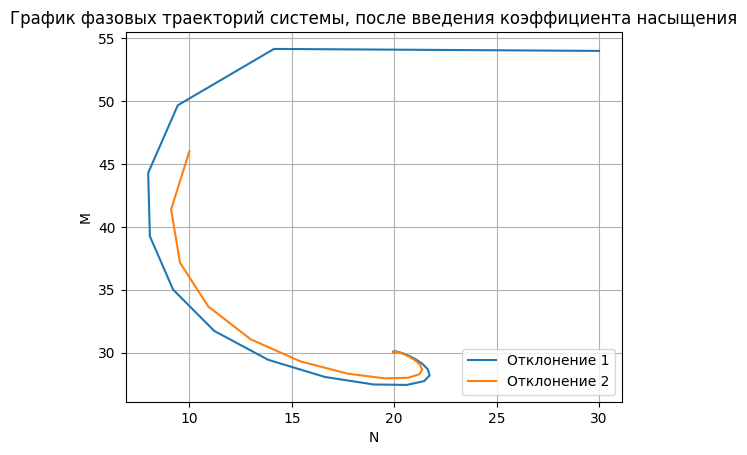

In [8]:
t = np.linspace(0, 100, 1000)  


sol2 = odeint(func3, [N_0 + deltaN, M_0 + deltaM], t)


sol3 = odeint(func3, [N_0 - deltaN, M_0 - deltaM], t)


plt.figure()
plt.title('График фазовых траекторий системы, после введения коэффициента насыщения')
plt.plot(sol2[:, 0], sol2[:, 1], label='Отклонение 1')
plt.plot(sol3[:, 0], sol3[:, 1], label='Отклонение 2')
plt.xlabel('N')
plt.ylabel('M')
plt.legend()
plt.grid(True)
plt.show()


Вывод: Замечаем, что в этом случае фазовые траектории имеют вид спиралей сходящихся с течением времени к положению равновесия, а амплитуда колебаний уменьшается с течением времени.